In [1]:
# Установка необходимых зависимостей
!pip install -r requirements.txt

# Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Получение данных

Для пролучения данных для анализа зашёл на свою страницу ВК, перешёл в раздел "Статистика" и выгрузил информацию в формате CSV.

In [5]:
data = pd.read_csv("data/vk_user.csv")

# Анализ структуры датафрейма

### Обзор первых пяти и последних пяти строчек таблицы

In [ ]:
data

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,08.08.2025,views,NaN,NaN,0
1,08.08.2025,visitors,NaN,NaN,0
2,08.08.2025,feedback,Нравится,NaN,2
3,08.08.2025,members,Новые подписчики,NaN,1
4,04.07.2025,views,NaN,NaN,0
...,...,...,...,...,...
2218,04.05.2012,visitors,NaN,NaN,0
2219,04.05.2012,members,Новые подписчики,NaN,1
2220,25.04.2012,views,NaN,NaN,0
2221,25.04.2012,visitors,NaN,NaN,0


Таблица имеет столбцы: "Дата", "Критерий", "Парам.№1", "Парам.№2" и "Значение".

Из беглого осмотра видно несколько ограничений данных:
* Нет времени публикации - только даты.

* Нет информации о постах - нельзя определить промежутки между публикациями.

* Данные агрегированы по дням - нельзя выделить время суток.


Попробуем извлечь полезную информацию из имеющихся данных.


### Посмотрим информацию о типах данных и пропущенных значениях

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Дата       2223 non-null   object 
 1   Критерий   2223 non-null   object 
 2   Парам. №1  743 non-null    object 
 3   Парам. №2  0 non-null      float64
 4   Значение   2223 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 87.0+ KB


Видно, что столбец с датой имеет не верный формат $-$ необходимо преобразовать. 
Столбец "Парам.№2" полностью состоит из пропусков $-$ удалим его.

In [ ]:
# Преобразование столбца "Дата" в datetime
data['Дата'] = pd.to_datetime(data['Дата'], format='%d.%m.%Y')
data

,Дата,Критерий,Парам. №1,Парам. №2,Значение
0,2025-08-08,views,NaN,NaN,0
1,2025-08-08,visitors,NaN,NaN,0
2,2025-08-08,feedback,Нравится,NaN,2
3,2025-08-08,members,Новые подписчики,NaN,1
4,2025-07-04,views,NaN,NaN,0
...,...,...,...,...,...
2218,2012-05-04,visitors,NaN,NaN,0
2219,2012-05-04,members,Новые подписчики,NaN,1
2220,2012-04-25,views,NaN,NaN,0
2221,2012-04-25,visitors,NaN,NaN,0


In [ ]:
# Удаление неинформативного столбца
data = data.drop("Парам. №2", axis=1)
data

,Дата,Критерий,Парам. №1,Значение
0,2025-08-08,views,NaN,0
1,2025-08-08,visitors,NaN,0
2,2025-08-08,feedback,Нравится,2
3,2025-08-08,members,Новые подписчики,1
4,2025-07-04,views,NaN,0
...,...,...,...,...
2218,2012-05-04,visitors,NaN,0
2219,2012-05-04,members,Новые подписчики,1
2220,2012-04-25,views,NaN,0
2221,2012-04-25,visitors,NaN,0


### Проведём фильтрацию, чтобы получить информацию о количестве лайков

In [ ]:
data = data[(data["Критерий"] == "feedback") & (data["Парам. №1"] == "Нравится")]

In [ ]:
# Оставляем только нужные столбцы и переименовываем
data = data[["Дата", "Значение"]].rename(columns={"Значение": "Нравится"})

data

,Дата,Нравится
2,2025-08-08,2
19,2024-11-22,1
45,2024-08-09,1
134,2023-09-02,2
143,2023-07-28,2
...,...,...
2058,2014-04-07,3
2108,2013-10-03,2
2113,2013-09-25,1
2136,2013-06-06,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 2 to 2222
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Дата      272 non-null    datetime64[ns]
 1   Нравится  272 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [ ]:
data

,Дата,Нравится
2,2025-08-08,2
19,2024-11-22,1
45,2024-08-09,1
134,2023-09-02,2
143,2023-07-28,2
...,...,...
2058,2014-04-07,3
2108,2013-10-03,2
2113,2013-09-25,1
2136,2013-06-06,2


### Отсортируем таблицу по возрастанию даты

In [ ]:
# СОРТИРОВКА по дате (от старых к новым)
data = data.sort_values('Дата')
# Сброс индекса
data = data.reset_index(drop=True)
data




,Дата,Нравится
0,2012-04-25,1
1,2013-06-06,2
2,2013-09-25,1
3,2013-10-03,2
4,2014-04-07,3
...,...,...
267,2023-07-28,2
268,2023-09-02,2
269,2024-08-09,1
270,2024-11-22,1


## Создадим новые прищнаки для анализа

In [ ]:
# Добавляем признаки для анализа
data['День_недели'] = data['Дата'].dt.dayofweek  # Извлекли день недели (0=понедельник, 6=воскресенье)
data['Месяц'] = data['Дата'].dt.month            # Извлекли месяц
data['Год'] = data['Дата'].dt.year               # Извлекли год
data['День_года'] = data['Дата'].dt.dayofyear    # Извлекли день года

data



,Дата,Нравится,День_недели,Месяц,Год,День_года
0,2012-04-25,1,2,4,2012,116
1,2013-06-06,2,3,6,2013,157
2,2013-09-25,1,2,9,2013,268
3,2013-10-03,2,3,10,2013,276
4,2014-04-07,3,0,4,2014,97
...,...,...,...,...,...,...
267,2023-07-28,2,4,7,2023,209
268,2023-09-02,2,5,9,2023,245
269,2024-08-09,1,4,8,2024,222
270,2024-11-22,1,4,11,2024,327


### Получим средние значения количества лайков по дням недели

In [ ]:
# Анализ по дням недели
likes_by_weekday = data.groupby('День_недели')['Нравится'].mean()
print("Среднее количество лайков по дням недели:")
print(likes_by_weekday)

Среднее количество лайков по дням недели:
День_недели
0    2.620690
1    2.309524
2    3.973684
3    1.978261
4    2.410256
5    1.333333
6    1.484848
Name: Нравится, dtype: float64


### Визуализируем

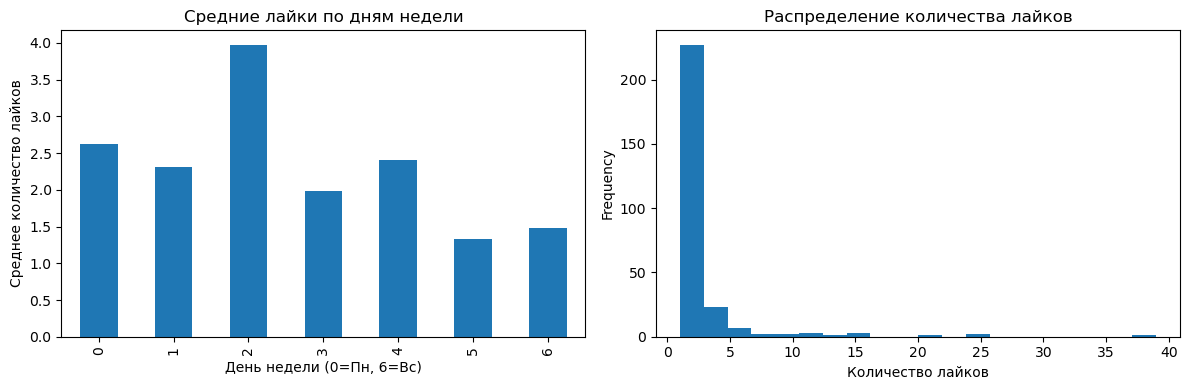

In [ ]:
# Визуализация
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
likes_by_weekday.plot(kind='bar')
plt.title('Средние лайки по дням недели')
plt.xlabel('День недели (0=Пн, 6=Вс)')
plt.ylabel('Среднее количество лайков')

plt.subplot(1, 2, 2)
data['Нравится'].plot(kind='hist', bins=20)
plt.title('Распределение количества лайков')
plt.xlabel('Количество лайков')

plt.tight_layout()
plt.show()

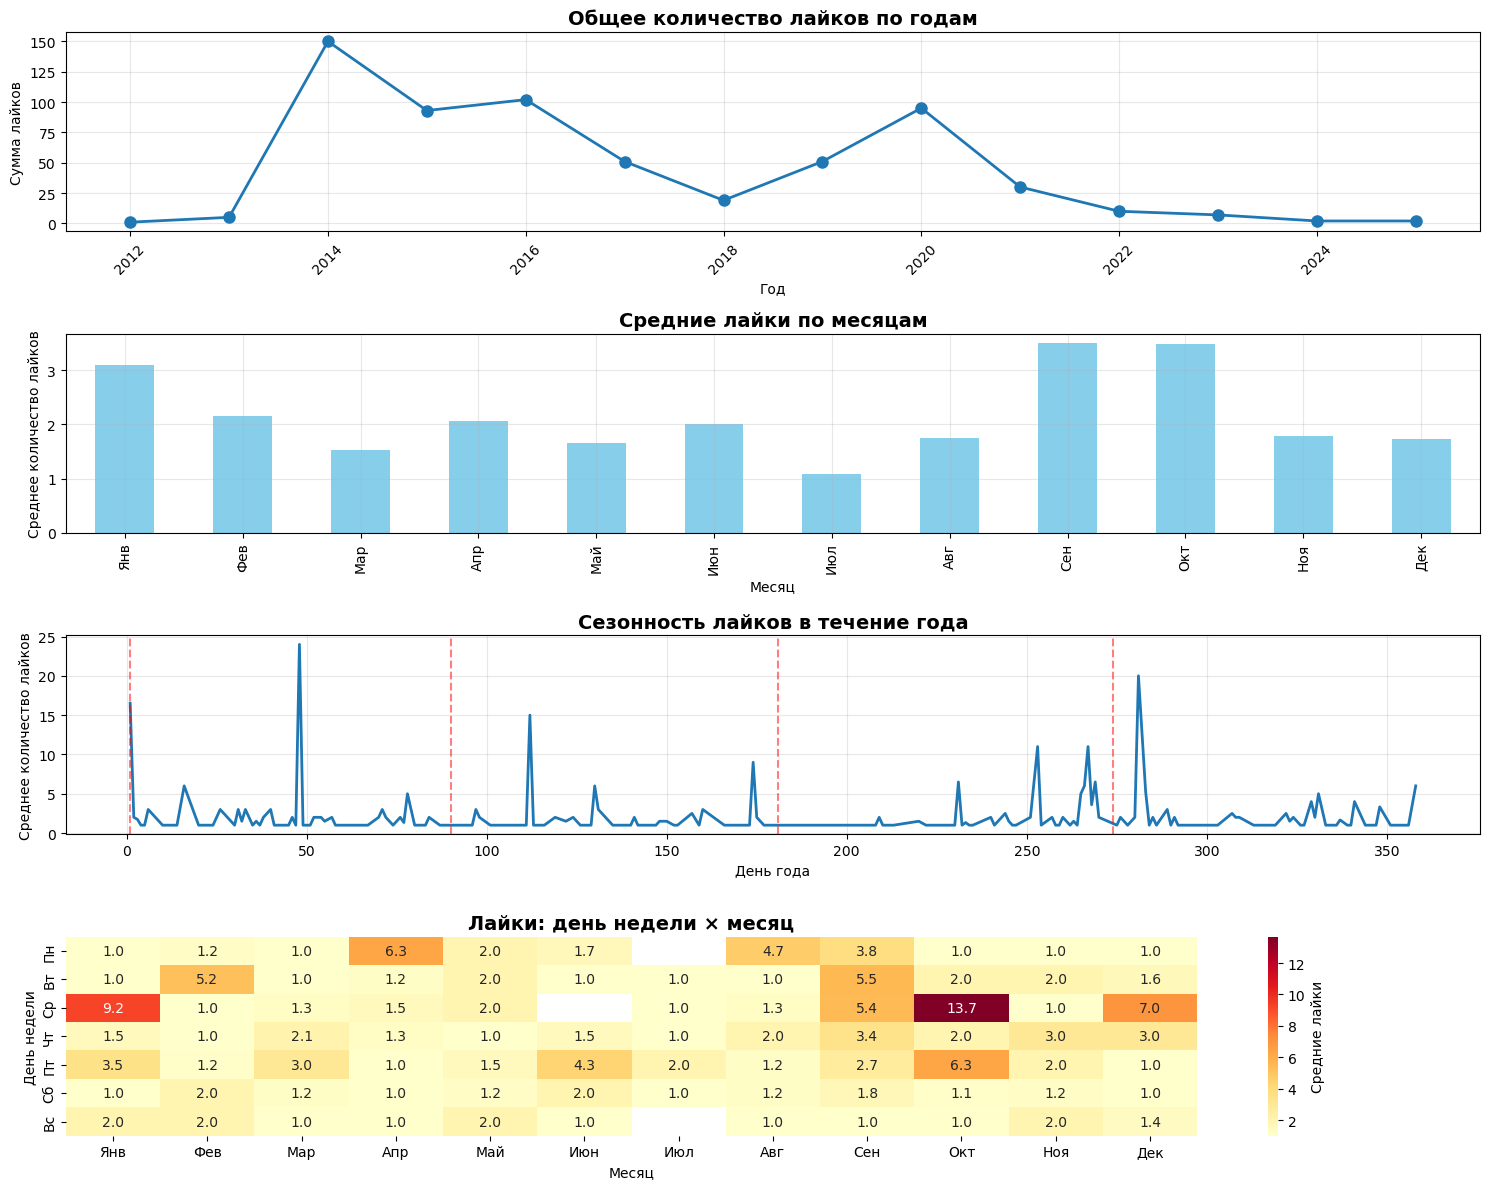

In [ ]:
# 1. Тренд лайков по годам
plt.figure(figsize=(15, 12))

plt.subplot(4, 1, 1)
yearly_trend = data.groupby('Год')['Нравится'].sum()
yearly_trend.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Общее количество лайков по годам', fontsize=14, fontweight='bold')
plt.xlabel('Год')
plt.ylabel('Сумма лайков')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. Тренд по месяцам
plt.subplot(4, 1, 2)
monthly_trend = data.groupby('Месяц')['Нравится'].mean()
months = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
monthly_trend.index = months
monthly_trend.plot(kind='bar', color='skyblue')
plt.title('Средние лайки по месяцам', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество лайков')
plt.grid(True, alpha=0.3)

# 3. Сезонность по дням года
plt.subplot(4, 1, 3)
seasonal_data = data.groupby('День_года')['Нравится'].mean()
plt.plot(seasonal_data.index, seasonal_data.values, linewidth=2)
plt.title('Сезонность лайков в течение года', fontsize=14, fontweight='bold')
plt.xlabel('День года')
plt.ylabel('Среднее количество лайков')
plt.grid(True, alpha=0.3)

# Добавляем квартальные разделители
quarter_days = [1, 90, 181, 274]
for day in quarter_days:
    plt.axvline(x=day, color='red', linestyle='--', alpha=0.5)

# 4. Heatmap дня недели vs месяц
plt.subplot(4, 1, 4)
pivot_table = data.pivot_table(values='Нравится', 
                              index='День_недели', 
                              columns='Месяц', 
                              aggfunc='mean')

# Переименовываем для читаемости
days_of_week = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
pivot_table.index = days_of_week
pivot_table.columns = months

sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt='.1f', 
            cbar_kws={'label': 'Средние лайки'})
plt.title('Лайки: день недели × месяц', fontsize=14, fontweight='bold')
plt.xlabel('Месяц')
plt.ylabel('День недели')

plt.tight_layout()
plt.show()

### Интерактивный график динамики лайков

In [ ]:
fig = px.line(data, x='Дата', y='Нравится', 
              title='Динамика лайков во времени',
              hover_data=['День_недели', 'Месяц'])
fig.show()

## Корреляционный анализ

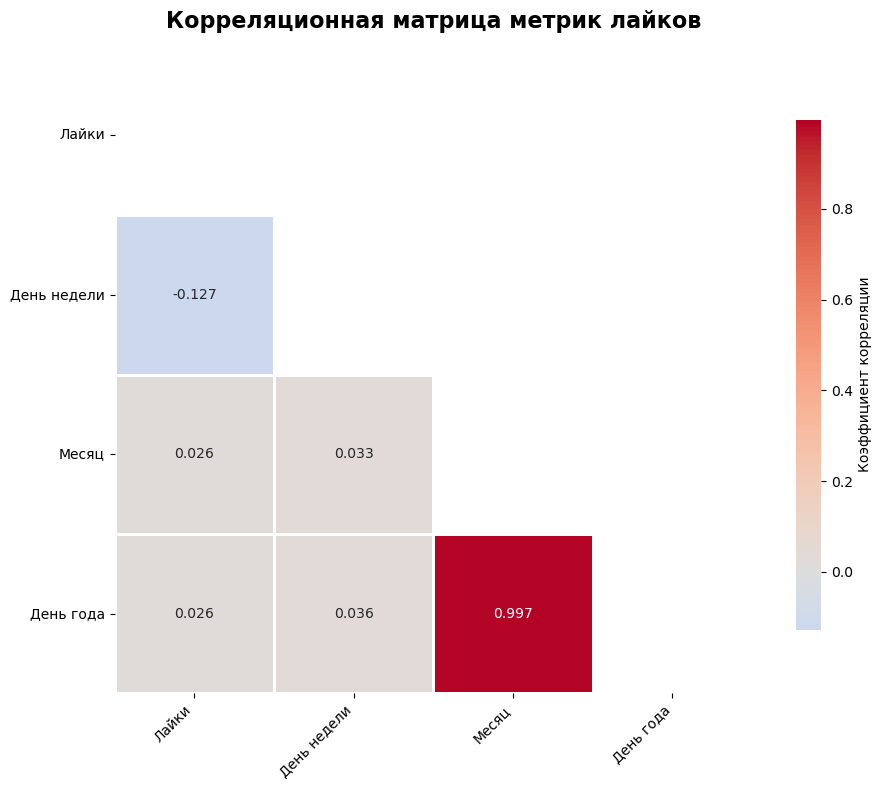

КОРРЕЛЯЦИОННАЯ МАТРИЦА
             Лайки  День недели  Месяц  День года
Лайки        1.000       -0.127  0.026      0.026
День недели -0.127        1.000  0.033      0.036
Месяц        0.026        0.033  1.000      0.997
День года    0.026        0.036  0.997      1.000

ИНТЕРПРЕТАЦИЯ КОРРЕЛЯЦИЙ:
• Лайки - День недели: -0.127 (очень слабая/отсутствует отрицательная корреляция)
• Лайки - Месяц: 0.026 (очень слабая/отсутствует положительная корреляция)
• Лайки - День года: 0.026 (очень слабая/отсутствует положительная корреляция)
• День недели - Месяц: 0.033 (очень слабая/отсутствует положительная корреляция)
• День недели - День года: 0.036 (очень слабая/отсутствует положительная корреляция)
• Месяц - День года: 0.997 (сильная положительная корреляция)


In [ ]:
# Корреляционный анализ с визуализацией
plt.figure(figsize=(10, 8))

# Создаем корреляционную матрицу
correlation_matrix = data[['Нравится', 'День_недели', 'Месяц', 'День_года']].corr()

# Переименовываем столбцы для лучшей читаемости
correlation_matrix.columns = ['Лайки', 'День недели', 'Месяц', 'День года']
correlation_matrix.index = ['Лайки', 'День недели', 'Месяц', 'День года']

# Создаем heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника

sns.heatmap(correlation_matrix, 
            mask=mask,  # Скрываем верхний треугольник (дублирующую информацию)
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8, 'label': 'Коэффициент корреляции'},
            linewidths=1,
            linecolor='white')

plt.title('Корреляционная матрица метрик лайков', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Выводим числовую матрицу для справки
print("="*60)
print("КОРРЕЛЯЦИОННАЯ МАТРИЦА")
print("="*60)
print(correlation_matrix.round(3))
print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ КОРРЕЛЯЦИЙ:")
print("="*60)

# Интерпретация результатов
correlation_interpretation = {
    'Лайки - День недели': f"{correlation_matrix.loc['Лайки', 'День недели']:.3f}",
    'Лайки - Месяц': f"{correlation_matrix.loc['Лайки', 'Месяц']:.3f}", 
    'Лайки - День года': f"{correlation_matrix.loc['Лайки', 'День года']:.3f}",
    'День недели - Месяц': f"{correlation_matrix.loc['День недели', 'Месяц']:.3f}",
    'День недели - День года': f"{correlation_matrix.loc['День недели', 'День года']:.3f}",
    'Месяц - День года': f"{correlation_matrix.loc['Месяц', 'День года']:.3f}"
}

for metric, value in correlation_interpretation.items():
    corr_value = float(value)
    if abs(corr_value) > 0.7:
        strength = "сильная"
    elif abs(corr_value) > 0.5:
        strength = "умеренная" 
    elif abs(corr_value) > 0.3:
        strength = "слабая"
    else:
        strength = "очень слабая/отсутствует"
    
    direction = "положительная" if corr_value > 0 else "отрицательная"
    
    print(f"• {metric}: {value} ({strength} {direction} корреляция)")

## Выводы по лучшему времени для публикаций

In [ ]:
# Рекомендации для публикаций
best_days = likes_by_weekday.nlargest(3)
best_months = data.groupby('Месяц')['Нравится'].mean().nlargest(3)

print("РЕКОМЕНДАЦИИ ДЛЯ ПУБЛИКАЦИЙ:")
print(f"Лучшие дни: {list(best_days.index)}")
print(f"Лучшие месяцы: {list(best_months.index)}")

# Расчет потенциального охвата
avg_engagement = data['Нравится'].mean()
print(f"\nСредний охват на пост: {avg_engagement:.1f} лайков")

РЕКОМЕНДАЦИИ ДЛЯ ПУБЛИКАЦИЙ:
Лучшие дни: [2, 0, 4]
Лучшие месяцы: [9, 10, 1]

Средний охват на пост: 2.3 лайков


In [ ]:
fig = px.line(data, x='Дата', y='Нравится', 
              title='Динамика лайков во времени',
              hover_data=['День_недели', 'Месяц'])
fig.show()